## Import required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/ipba17-grade-ml-case-study-classification-code/sample_submission.csv
/kaggle/input/ipba17-grade-ml-case-study-classification-code/train.csv
/kaggle/input/ipba17-grade-ml-case-study-classification-code/test.csv


## About The Dataset

 The dataset contains a variety of features that describe employees and their workplace. Here are the key features included:
1. ID: Employee identifier - This is a unique identifier for each employee in the dataset.

2. Age: Age of the employee - This column represents the age each employee in years.

3. BusinessTravel: Frequency of travel for work - This column describes how often the employee travels for work, such as "Non-Travel," "Travelarely," or "Travel_Frequently."

4. DailyRate: Daily rate of pay - This represents the daily rate of pay for each employee.

5. Department: The department in which the employee works - This column indicates the specific department or division within the company where employee is employed.

6. DistanceFromHome: Distance of the employee's residence from the workplace - This column represents the distance in miles between the employee's home and the workplace.

7. Education: Level of education achieved - This column indicates the highest level of education completed by employee.In education 1 means 'Below College', 2 means 'College', 3 means 'Bachelor', 4 means 'Master', 5 means 'Doctor'

8. EducationField: Field of education - This describes the field of education or specialization of the employee.

9. EmployeeCount: Number of employees - This column potentially holds a constant value for all rows and represents the total number of employees.

10. EnvironmentSatisfaction: Satisfaction with the work environment - This represents the employee's satisfaction with the work environment, possibly measured on a scale.

11. Gender: Gender of employee - This column indicates the gender of the employee.

12. HourlyRate: Hourly rate of pay - This represents the hourly rate of pay for each employee.

13. JobInvolvement: Level of job involvement - This column represents the employee's level of involvement in their job, possibly measured on a scale where 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'

14. JobLevel: Job level within the - This denotes the level or rank of the employee within the company's hierarchy.

15. JobRole: Role or position held by the - This specifies the specific role or position held by each employee, such as "Sales Executive," "Research Scientist," etc.

16. JobSatisfaction Satisfaction with the job - This column represents the employee's satisfaction with their job, measured on a scale where, 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'

17. MaritalStatus: Marital of the employee - This indicates the marital status of the employee, such as "Married," "Single," or "Divorced."

18. MonthlyIncome: total monetary value paid by the organization to an employee.

19. MonthlyRate: Monthly rate of pay - This denotes monthly rate of pay for each employee.

20. NumCompaniesWorked: Number of companies the employee has worked for - This column indicates the number of previous companies the employee has been employed by.

21. Over18: Is the employee age over than 18 or not.

22. Time: Whether the employee works overtime - This column indicates whether the employee overtime, typically denoted as "Yes" or "No."

23. PercentSalaryHike: Percentage increase in salary - This represents percentage increase in salary for each employees.

24. PerformanceRating: Performance rating of the employee - This column represents the employee's rating which may be assessed on a scale 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

25. RelationshipSatisfaction: Satisfaction with work relationships - This column indicates the employee's satisfaction with work, possibly measured on a scale 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

26. StandardHours: Standard hours worked - This column potentially holds a constant value for all rows and represents the standard number of working hours in the relevant time period.

27. StockOptionLevel:Employee stock options, also known as ESOs, are stock options in the company’s stock granted by an employer to certain employees. Typically they are granted to those in management or officer-level positions. Stock options give the employee the right to buy a certain amount of stock at a specific price, during a specific period of time. Options typically have expiration dates as well, by which the options must have been exercised, otherwise they will become worthless

28. TotalWorkingYears: Total years of work experience - column represents the total number of years of work experience for each employee.

29. TrainingTimesLastYear: Number of times the employee was trained last year - This column indicates the number of times the employee received training in the previous year.

30. WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

31. YearsAtCompany: Years at the current company - This represents the number of years the employee has been with the current company.

32. YearsInCurrentRole: Years in the current role - This indicates the number of years the employee has been in the current role or position.

33. YearsSinceLastProm: Years since the last promotion - This column represents the number of years since the employee's last promotion.

34. YearsWithCurrManager: Years with the current manager - This denotes the number of years that the employee has been working with the current manager.

35. Attrition: Target variable indicating whether the employee has left the company (Yes/No) - This column serves as the target variable for prediction, indicating whether the employee has left the companyattrition) with "Yes" or "No" values  

### Reading the Datafile

In [2]:
df_1 = pd.read_csv('/kaggle/input/ipba17-grade-ml-case-study-classification-code/train.csv') #Train
df_2 = pd.read_csv('/kaggle/input/ipba17-grade-ml-case-study-classification-code/test.csv')  # Test
# Saving the DataFrames into variables


In [3]:
# Train dataset First View
df_1.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


### Rows and Columns Count in Train and Test Dataset

In [4]:
df_1.shape


(1677, 35)

In [5]:
df_2.shape

(1119, 34)

In [6]:
#'id' column is just a unique identifier for each row and doesn't contain any valuable information or patterns, it can be dropped.
# EmployeeCount, Over18, StandardHours are having only one value. Thus these can be dropped
drop_col=['id','EmployeeCount', 'Over18', 'StandardHours']
df =df_1.drop(drop_col,axis=1)
df.shape

(1677, 31)

### Columns Name of the train Dataframe

In [7]:
df.columns.values

array(['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype=object)

### Data types of Each column

In [8]:
display(df.info())# Train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1677 non-null   int64 
 1   BusinessTravel            1677 non-null   object
 2   DailyRate                 1677 non-null   int64 
 3   Department                1677 non-null   object
 4   DistanceFromHome          1677 non-null   int64 
 5   Education                 1677 non-null   int64 
 6   EducationField            1677 non-null   object
 7   EnvironmentSatisfaction   1677 non-null   int64 
 8   Gender                    1677 non-null   object
 9   HourlyRate                1677 non-null   int64 
 10  JobInvolvement            1677 non-null   int64 
 11  JobLevel                  1677 non-null   int64 
 12  JobRole                   1677 non-null   object
 13  JobSatisfaction           1677 non-null   int64 
 14  MaritalStatus           

None

## Checking Mising VAlue

In [9]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

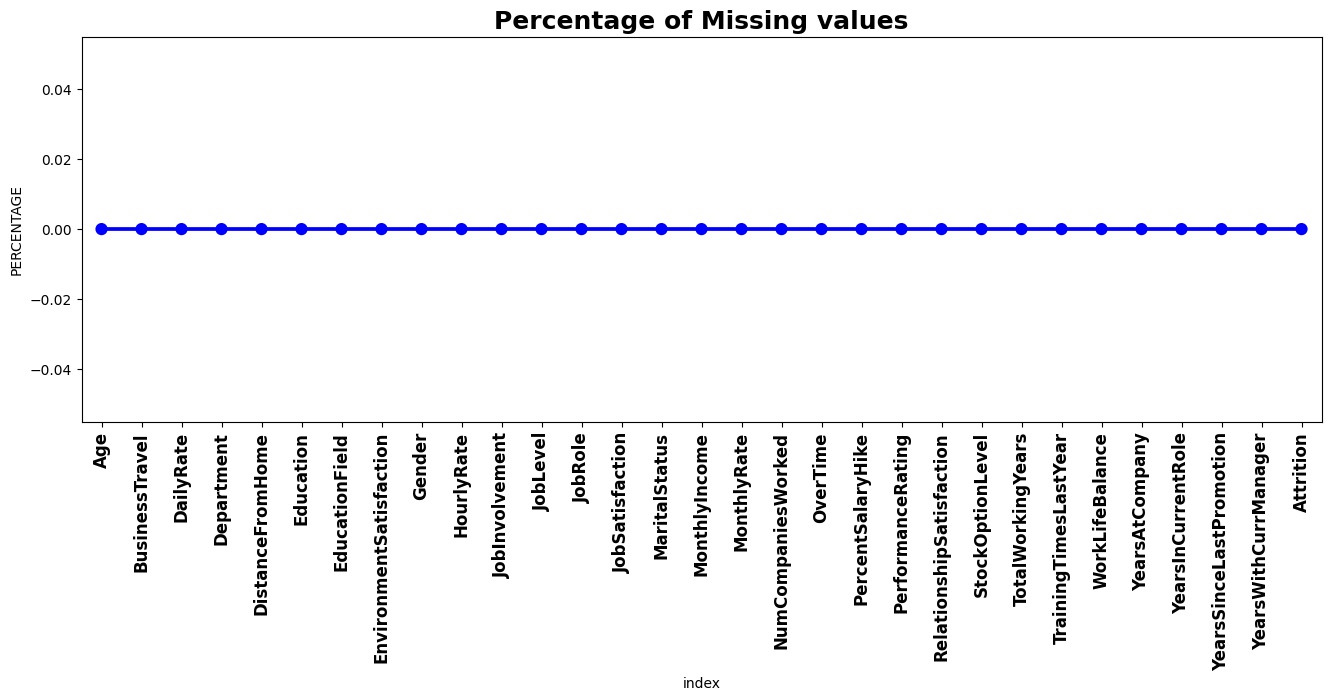

In [10]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing, color='blue')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')  # Make x-axis labels bold
plt.title("Percentage of Missing values", fontsize=18, fontweight='bold')  # Make the title bold
plt.ylabel("PERCENTAGE")
plt.show()

## Descriptive Statistics

In [11]:
df.head()
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,36.036971,892.749553,8.683959,2.937984,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,8.507112,374.496259,7.826143,1.039078,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,18.000000,107.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,589.000000,2.000000,2.000000,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,35.000000,890.000000,7.000000,3.000000,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,41.000000,1223.000000,12.000000,4.000000,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,60.000000,3921.000000,29.000000,15.000000,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


### Check Duplicates

In [12]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    1677
Name: count, dtype: int64
1677


### Checking & Plotting the Target Variable(Churn) on each categories

In [13]:
df['Attrition'] = df['Attrition'].replace({0: 'No', 1: 'Yes'})

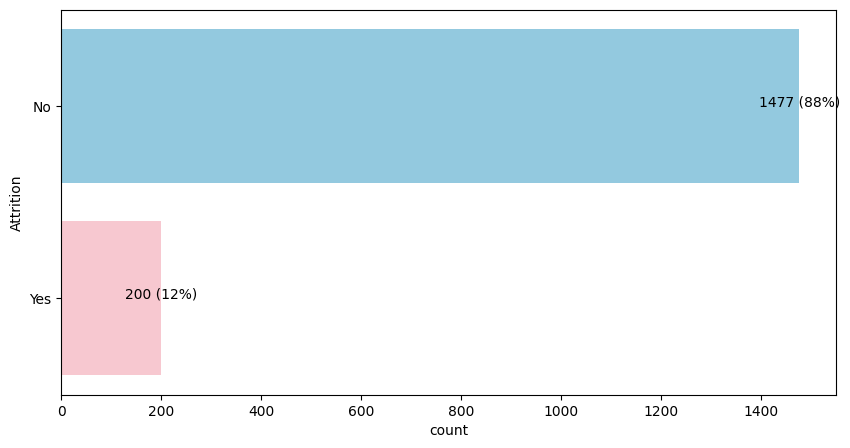

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Attrition' is the column you are counting in the DataFrame 'df'
plt.figure(figsize=(10, 5))
plt.rc("font", size=10)

# Create a countplot with custom colors
ax = sns.countplot(y='Attrition', data=df, palette=['SkyBlue', 'Pink'])


# Annotate each bar with count and rounded percentage
total = len(df['Attrition'])
for p in ax.patches:
    count = p.get_width()
    percentage = count / total * 100
    ax.text(count + 0.1, p.get_y() + p.get_height() / 2, f'{round(count)} ({round(percentage):.0f}%)', ha='center')

plt.show()


### EDA

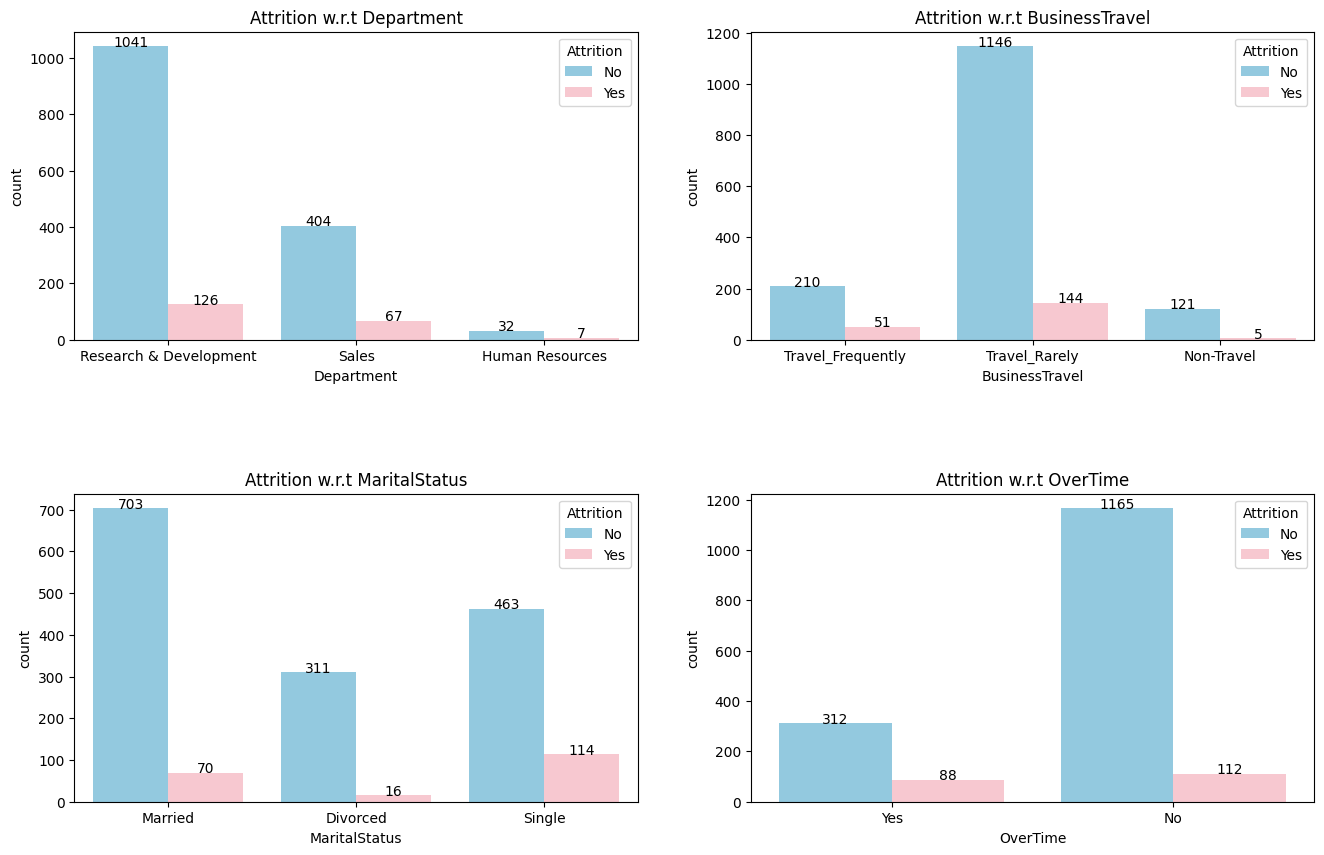

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x2 grid for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

# Plot 1: Department wrt Attrition
sns.countplot(x='Department', hue='Attrition', data=df, palette=['SkyBlue', 'Pink'], ax=axes[0, 0])
axes[0, 0].set_title("Attrition w.r.t Department")

# Plot 2: BusinessTravel wrt Attrition
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette=['SkyBlue', 'Pink'], ax=axes[0, 1])
axes[0, 1].set_title("Attrition w.r.t BusinessTravel")

# Plot 3: MaritalStatus wrt Attrition
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette=['SkyBlue', 'Pink'], ax=axes[1, 0])
axes[1, 0].set_title("Attrition w.r.t MaritalStatus")

# Plot 4: OverTime wrt Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df, palette=['SkyBlue', 'Pink'], ax=axes[1, 1])
axes[1, 1].set_title("Attrition w.r.t OverTime")

# Annotate each bar with count
for row in axes:
    for ax in row:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{round(height)}', ha='center')

plt.show()


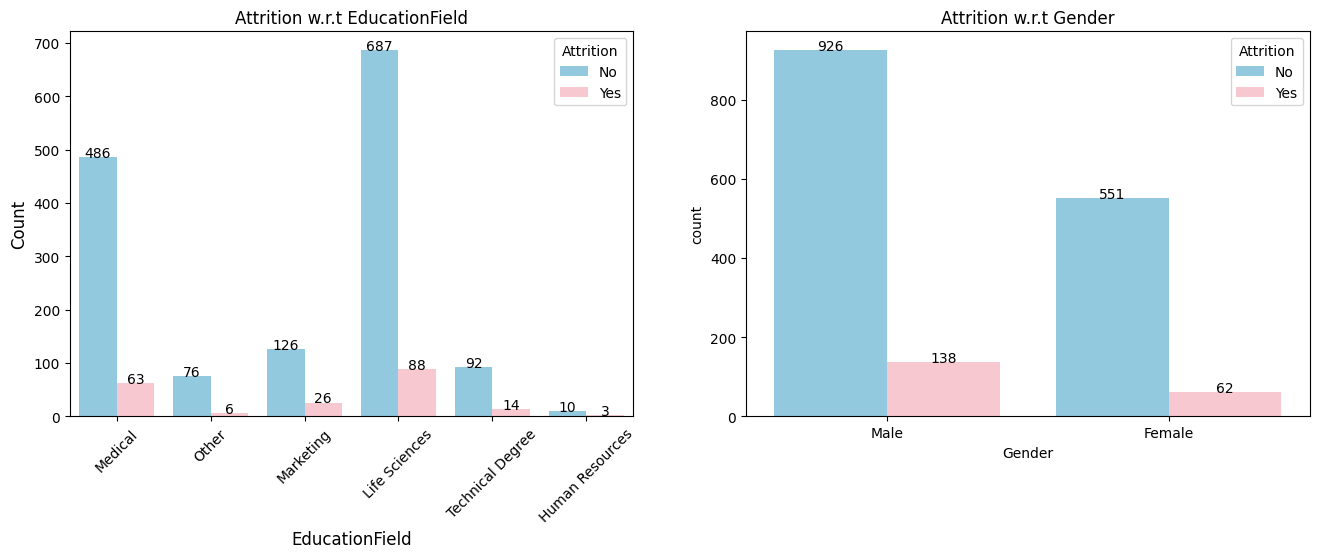

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 1x2 grid for the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot 1: Education Field wrt Attrition
sns.countplot(x='EducationField', hue='Attrition', data=df, palette=['SkyBlue', 'Pink'], ax=axes[0])
axes[0].set_title("Attrition w.r.t EducationField")
axes[0].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability
axes[0].set_xlabel('EducationField', fontsize=12)  # Increase font size for x-axis label
axes[0].set_ylabel('Count', fontsize=12)  # Increase font size for y-axis label

# Annotate each bar with count
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2, height + 0.1, f'{round(height)}', ha='center', fontsize=10)

# Plot 2: Gender wrt Attrition
sns.countplot(x='Gender', hue='Attrition', data=df, palette=['SkyBlue', 'Pink'], ax=axes[1])
axes[1].set_title("Attrition w.r.t Gender")

# Annotate each bar with count
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2, height + 0.1, f'{round(height)}', ha='center')

plt.show()


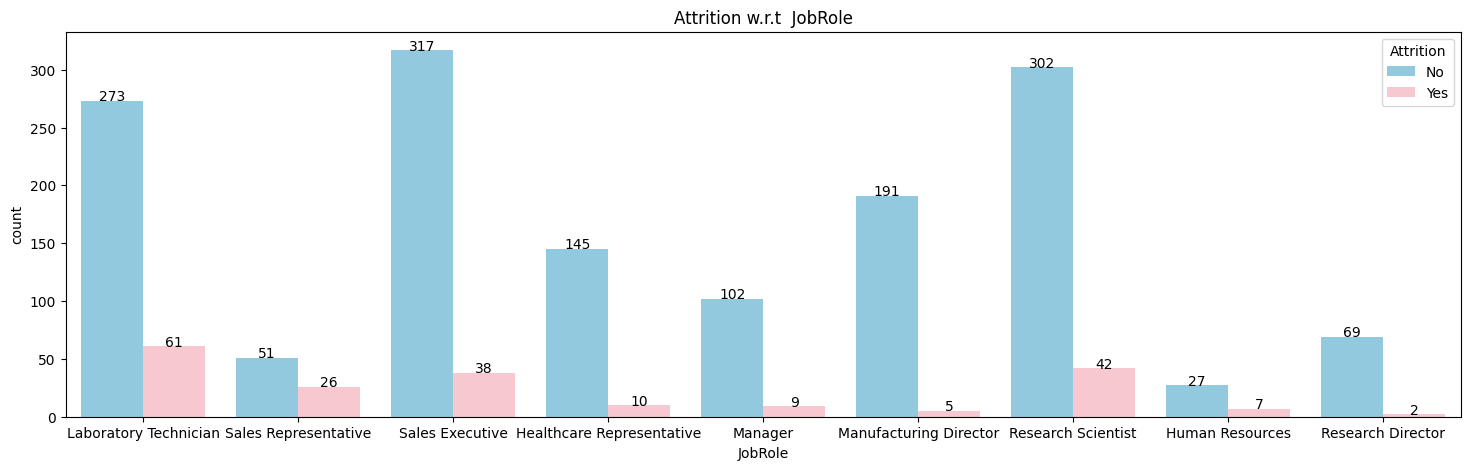

In [17]:
#  JobRole wrt Attrition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))
plt.rc("font", size=10)

# Create a countplot with custom colors
ax = sns.countplot(x='JobRole', hue='Attrition', data=df, palette=['SkyBlue', 'Pink'])

# Annotate each bar with count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{round(height)}', ha='center')

plt.title("Attrition w.r.t  JobRole")
plt.show()


In [18]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
df[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,3,4,3,4,3,2,3
1,3,1,3,1,3,4,3
2,3,3,3,4,3,4,3
3,3,3,3,1,3,3,1
4,4,2,3,1,3,3,3


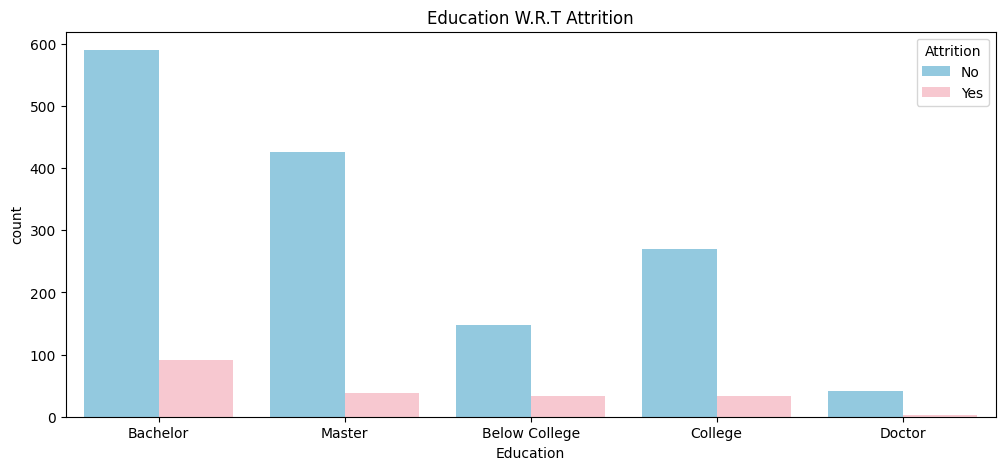

In [19]:
edu_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
plt.figure(figsize=(12, 5))
sns.countplot(x=df['Education'].map(edu_map), hue='Attrition', data=df, palette=['SkyBlue', 'Pink'])
plt.title("Education W.R.T Attrition")
plt.show()


**OBSERVATIONS**

Employees from Bachelor are more, then from Masters background. Attrition wrt to bachelor can be seem more because they have more and more expectation from companies and it will be interesting to see the reason behind this in this dataset.

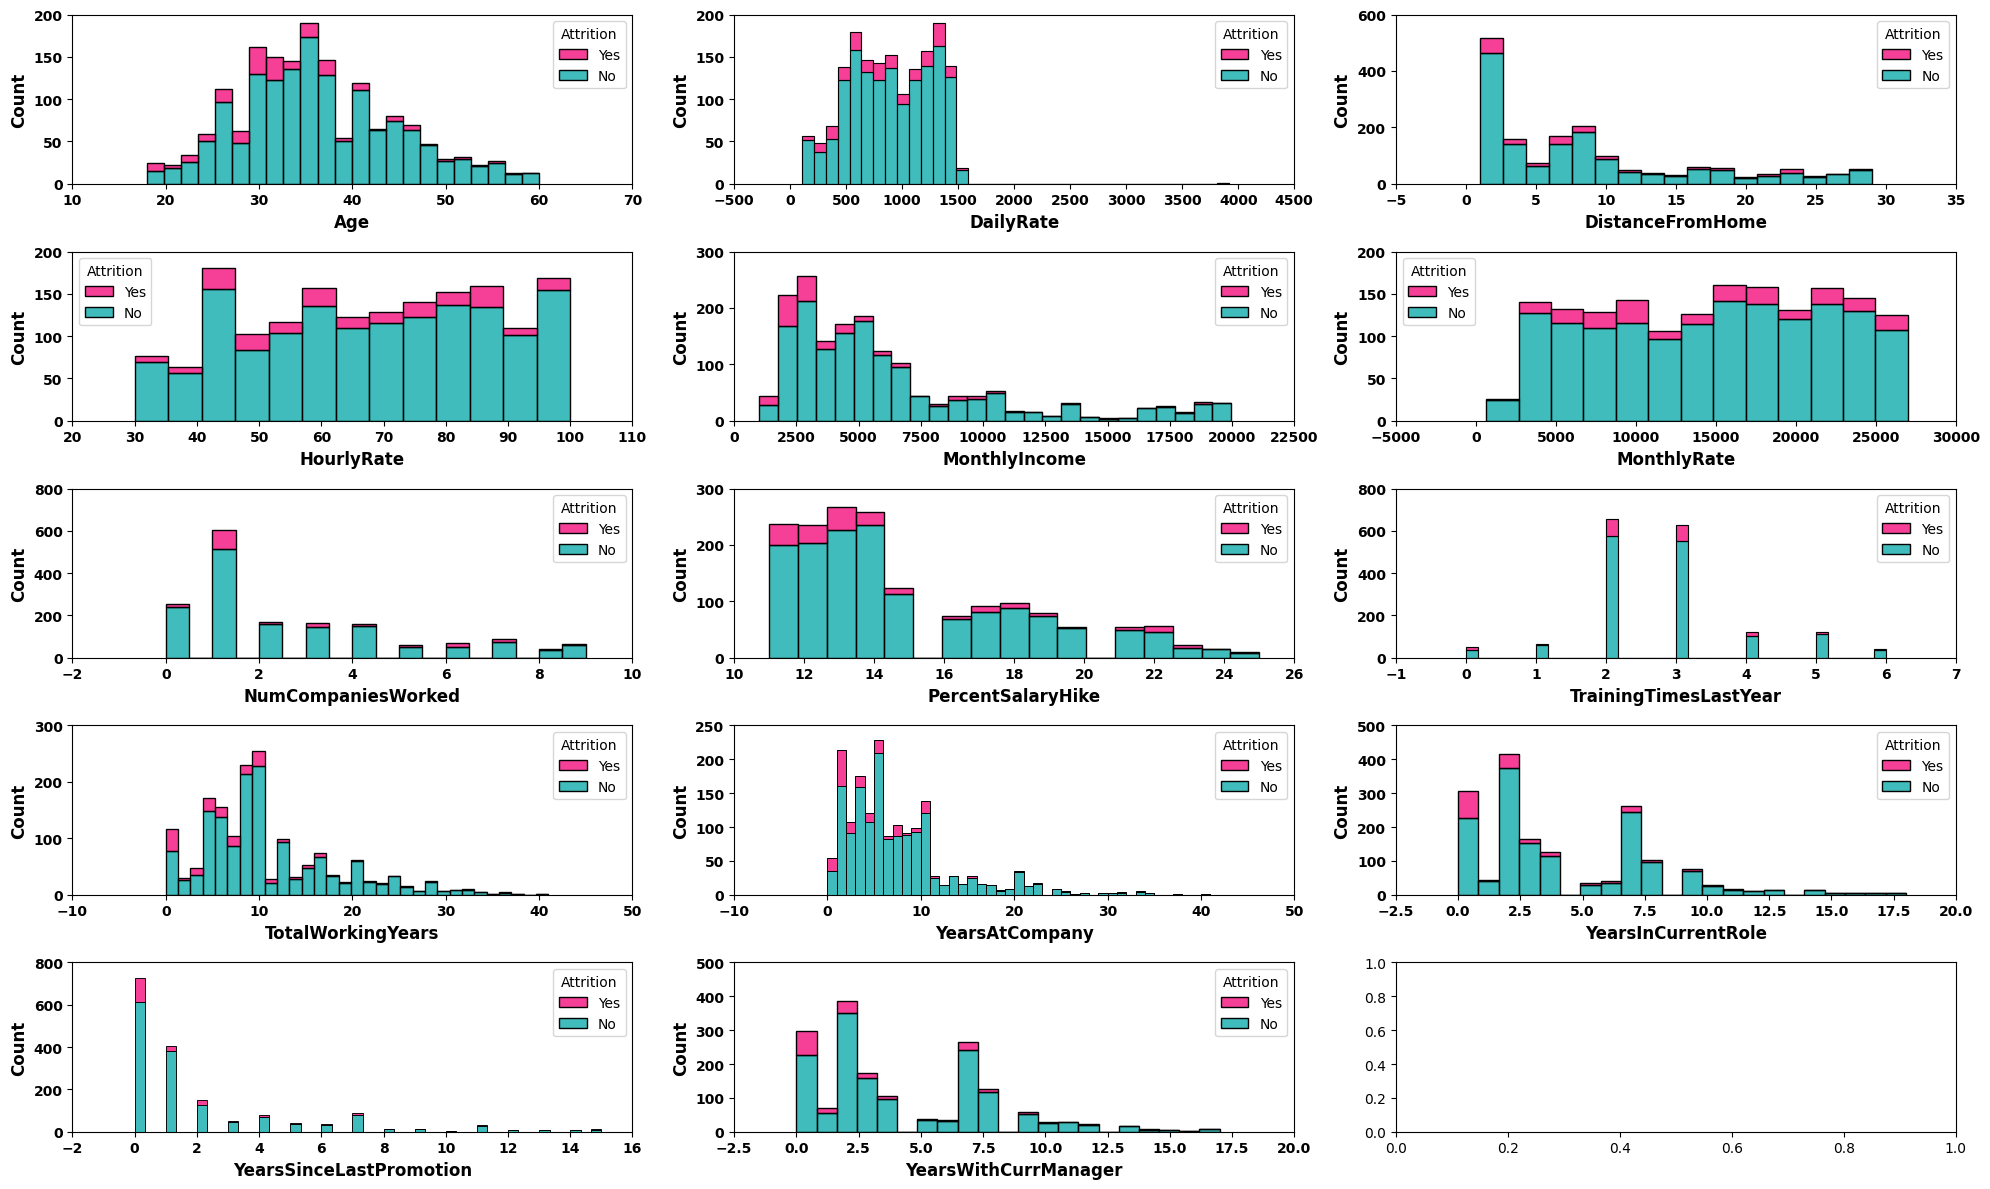

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TrainingTimesLastYear', 'TotalWorkingYears', 'YearsAtCompany',
                'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Set custom color palette for 'No' and 'Yes'
colors_dict = {'No': '#00A6A6', 'Yes': '#F40076'}

# Set the order of the hue variable
hue_order = ['Yes', 'No']

# Train set
fig, axes = plt.subplots(5, 3, figsize=(20, 12))
for i, j in zip(num_features, axes.flatten()):
    ax = sns.histplot(data=df, x=i, hue='Attrition', multiple='stack', ax=j, palette=colors_dict, hue_order=hue_order)

    # Make the labels bold
    ax.set_xlabel(i, fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')

    # Make x and y axis tick labels bold
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold')

fig.tight_layout()
plt.show()

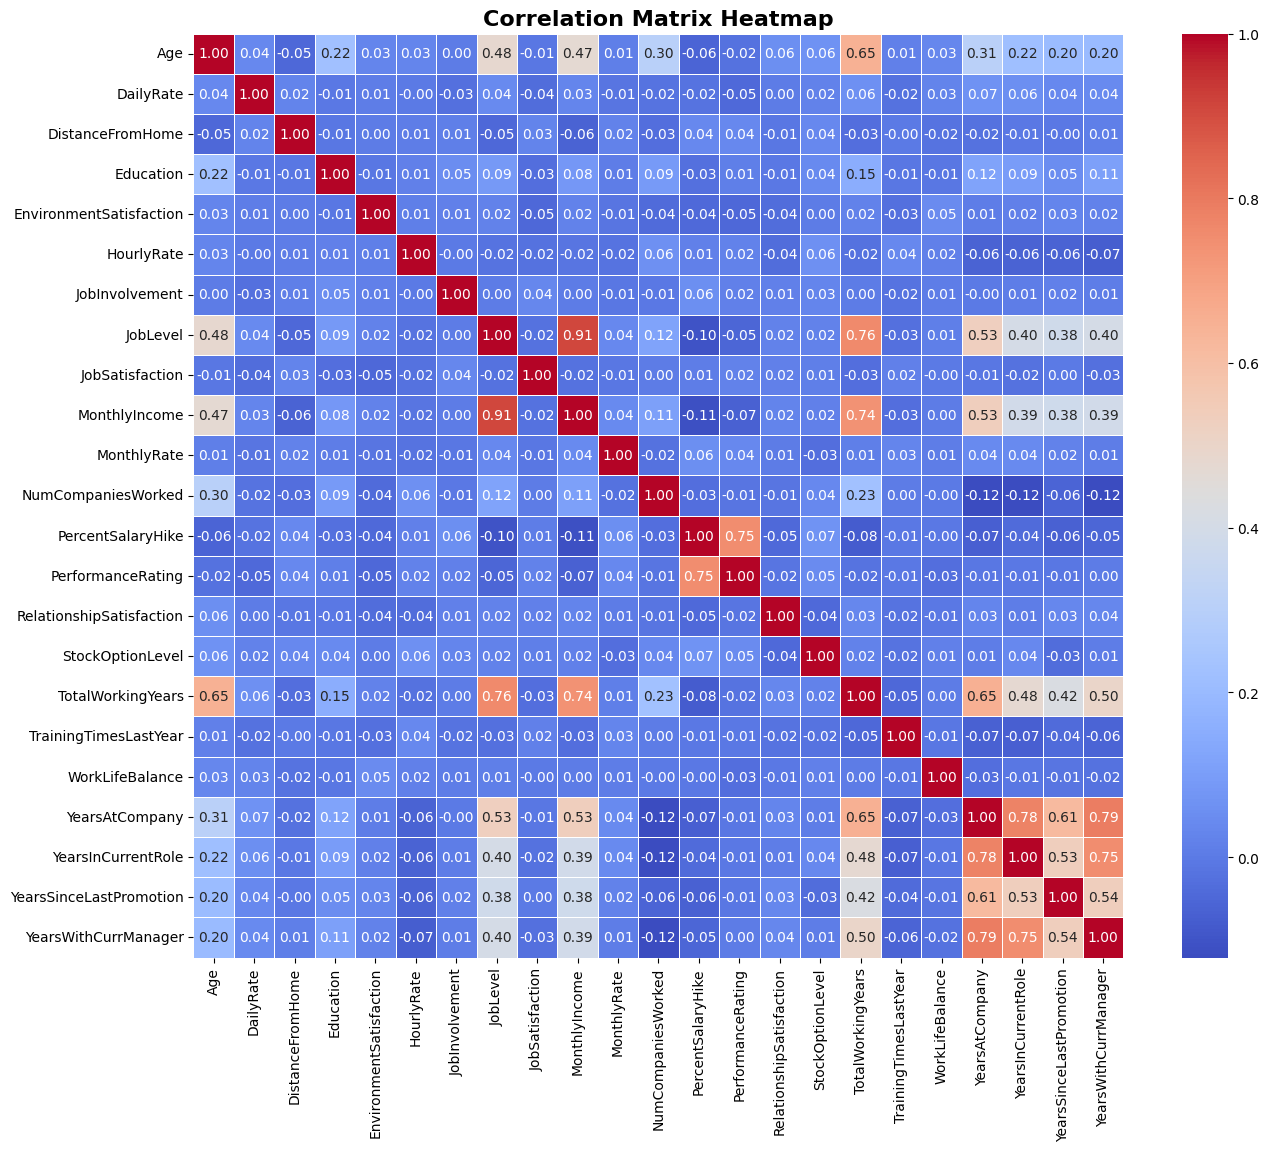

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected numerical features for correlation matrix
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
                'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Calculate the correlation matrix
corr_matrix = df[num_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.show()


## Label Encodeing
In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words

In [22]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,10,2,3,10,0,7,8,No
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,4,3,3,4,2,0,3,No
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,4,3,3,3,2,1,2,No
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,15,1,1,6,0,0,2,No
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Yes,13,3,3,0,31,0,3,31,14,4,10,Yes


In [23]:
# Target Variable(Attrition)
df['Attrition'] = df['Attrition'].replace({'No':0,'Yes':1})

In [24]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Yes,13,3,3,0,31,0,3,31,14,4,10,1


In [25]:
#encode binary variables
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [26]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,0,42,3,1,Laboratory Technician,4,Married,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,0,46,3,1,Sales Representative,1,Married,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,0,80,3,2,Sales Executive,4,Divorced,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,1,40,3,2,Healthcare Representative,1,Married,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,1,37,3,5,Manager,1,Single,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10,1


In [27]:
# encode categorical columns which are ordinal, use labelEncoding
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [28]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,1,599,1,24,3,3,4,0,42,3,1,2,4,1,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8,0
1,35,2,921,2,8,3,4,1,0,46,3,1,8,1,1,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3,0
2,32,2,718,2,26,3,2,3,0,80,3,2,7,4,0,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2,0
3,38,2,1488,1,2,3,3,3,1,40,3,2,0,1,1,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2,0
4,50,2,1017,1,5,4,3,2,1,37,3,5,3,1,2,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10,1


In [29]:
df.shape

(1677, 31)

### Build a corelation of all predictors with Attrition

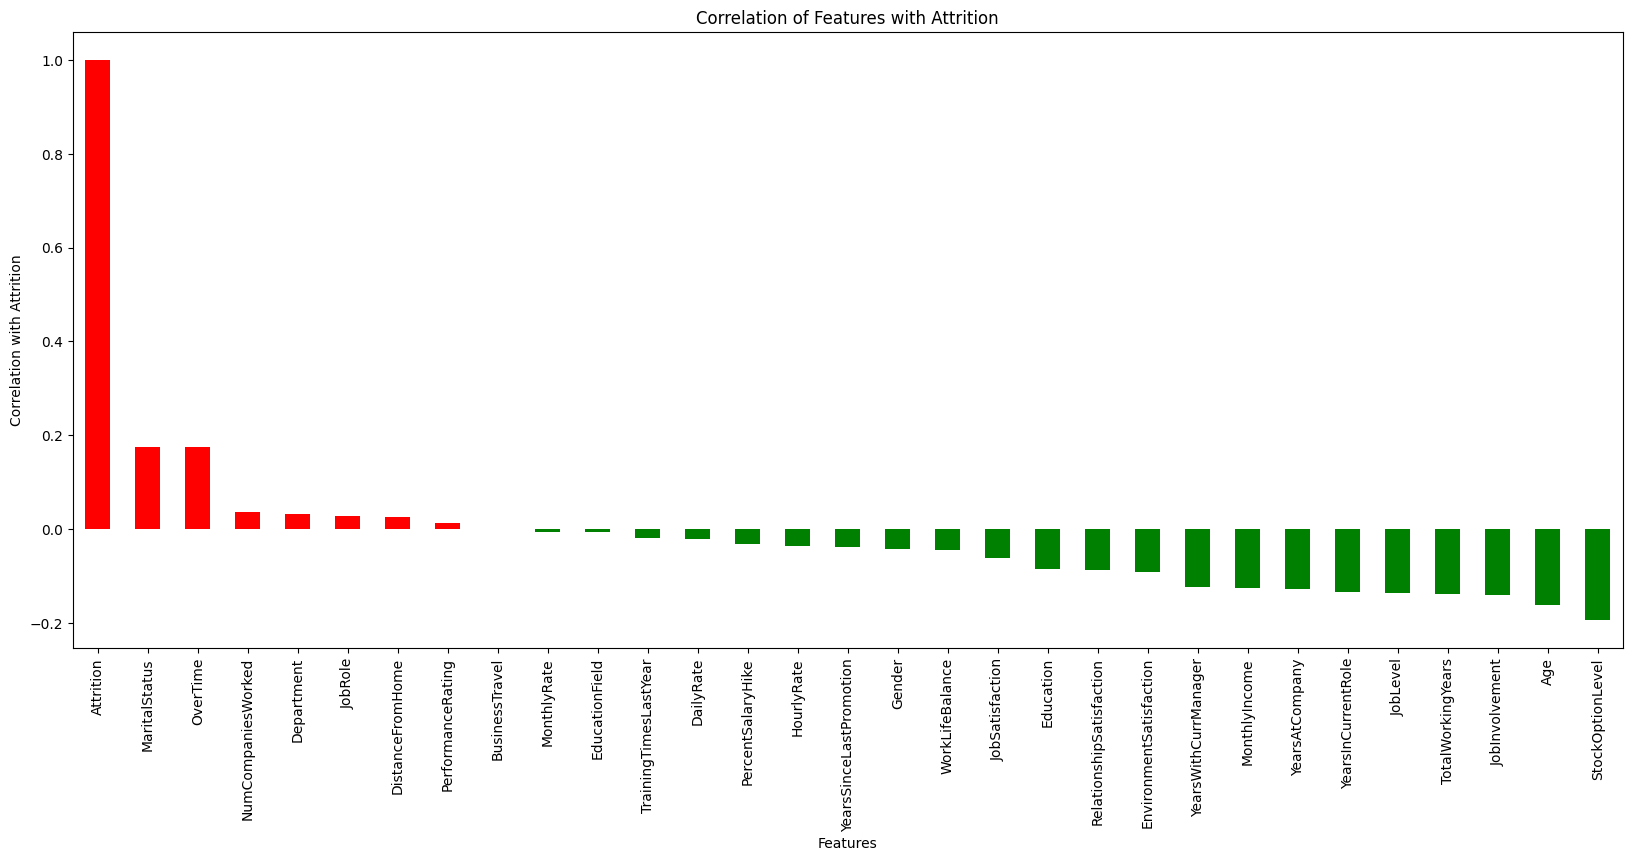

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 8))

# Calculate correlation and sort by values
correlation_data = df.corr()['Attrition'].sort_values(ascending=False)

# Define colors for positive and negative correlations
colors = ['red' if corr > 0 else 'green' for corr in correlation_data]

# Create a bar plot
correlation_data.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with Attrition')
plt.title('Correlation of Features with Attrition')

# Show the plot
plt.show()


In [31]:
from tabulate import tabulate

# Calculate correlation and sort by values in descending order
correlation_data = df.corr()['Attrition'].sort_values(ascending=False)

# Create a list of tuples for tabulate
table_data = [(feature, round(correlation, 4), f"{round((correlation * 100), 4)}%") for feature, correlation in correlation_data.items()]

# Add a header to the table
headers = ["Feature", "Correlation", "Correlation (%)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="pretty"))

# Print the total number of features
print(f"Total Features: {len(correlation_data)}")


+--------------------------+-------------+-----------------+
|         Feature          | Correlation | Correlation (%) |
+--------------------------+-------------+-----------------+
|        Attrition         |     1.0     |     100.0%      |
|      MaritalStatus       |   0.1745    |    17.4505%     |
|         OverTime         |    0.174    |    17.3965%     |
|    NumCompaniesWorked    |   0.0371    |     3.7127%     |
|        Department        |    0.032    |     3.1996%     |
|         JobRole          |   0.0279    |     2.7869%     |
|     DistanceFromHome     |   0.0247    |     2.4741%     |
|    PerformanceRating     |   0.0137    |     1.3666%     |
|      BusinessTravel      |   0.0006    |     0.0552%     |
|       MonthlyRate        |   -0.0055   |    -0.5484%     |
|      EducationField      |   -0.0065   |    -0.6513%     |
|  TrainingTimesLastYear   |   -0.0186   |    -1.8595%     |
|        DailyRate         |   -0.0224   |     -2.238%     |
|    PercentSalaryHike  

## Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [32]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition'].values

In [33]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,1,599,1,24,3,3,4,0,42,3,1,2,4,1,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8
1,35,2,921,2,8,3,4,1,0,46,3,1,8,1,1,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3
2,32,2,718,2,26,3,2,3,0,80,3,2,7,4,0,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2
3,38,2,1488,1,2,3,3,3,1,40,3,2,0,1,1,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2
4,50,2,1017,1,5,4,3,2,1,37,3,5,3,1,2,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10


In [34]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Logistic Regression Model in Machine Learning

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [36]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()

In [38]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
parameter= {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [39]:
from sklearn.model_selection import GridSearchCV

Classifier_regressor = GridSearchCV(Classifier, param_grid=parameter, scoring='accuracy', cv=5)


In [40]:
Classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [41]:
print(Classifier_regressor.best_params_)

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}


In [42]:
print(Classifier_regressor.best_score_)

0.8846487067602606


In [43]:
# Prediction
y_pred=Classifier_regressor.predict(X_test)

In [44]:
## accuracy Score
from sklearn.metrics import accuracy_score,classification_report

In [45]:
accuracy_lg  = accuracy_score(y_pred,y_test)
print(accuracy_lg)

0.8714285714285714


In [46]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      0.87      0.93       420
           1       0.00      0.00      0.00         0

    accuracy                           0.87       420
   macro avg       0.50      0.44      0.47       420
weighted avg       1.00      0.87      0.93       420



In [47]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[366   0]
 [ 54   0]]


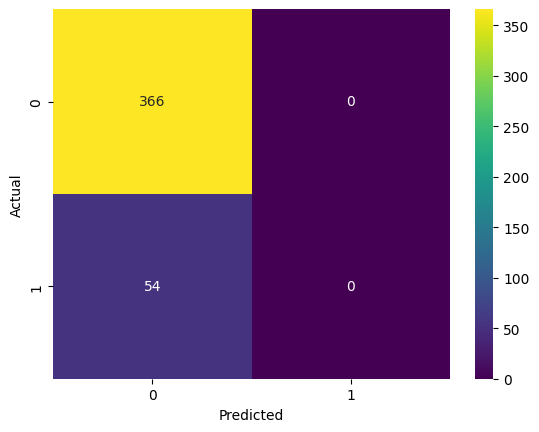

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cm is your confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Decision Tree Classifier

In [49]:
#Building a classification decision tree model on train set 
import sklearn.tree as tree 
from sklearn.model_selection import GridSearchCV

In [50]:
# Define and Split the Data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)


In [51]:
#Define the Decision Tree Classifier:
clf = tree.DecisionTreeClassifier()

In [52]:
# Initialize the decision tree classifier (Model)
clf = tree.DecisionTreeClassifier( max_depth= 5, random_state=42)

In [53]:
#Set Up Parameter Grid for GridSearchCV:
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
}

In [54]:
#Instantiate GridSearchCV:
mod = GridSearchCV(clf, param_grid=param_grid)


In [55]:
# Fit the Model to the Training Data:
mod.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25,
                                       30]})

In [56]:
#Print the Best Parameters:
print("Best Parameters: ", mod.best_params_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 2}


In [57]:
# Create the GridSearchCV object
mod = GridSearchCV(clf, param_grid, cv=5)
mod.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25,
                                       30]})

In [58]:
# Print the best estimator and best score
print("Best Estimator:", mod.best_estimator_)
print("Best Score:", mod.best_score_)

Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
Best Score: 0.8766900651362803


In [59]:
# Hyper parameter tunes which are found by the Grid search Cross validation on the descision tree model
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)

In [60]:
clf1.fit( X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)

In [61]:
# Check prediction on training set 
predictions = clf1.predict(X_train)  # Predicted values on the trainset. 
predictions


array([0, 0, 0, ..., 0, 0, 0])

In [62]:
y_train # Actual classes of traning dataset 

array([0, 0, 0, ..., 0, 0, 1])

In [63]:
# Accuracy of tree on training set ? 
# 89.5% 
clf1.score(X_train, y_train)

0.8957836117740652

In [64]:
accuracy_dec = clf1.score(X_test, y_test)# Accuracy of model on test set ( Unseen data-set)
print(accuracy_dec)

0.8714285714285714


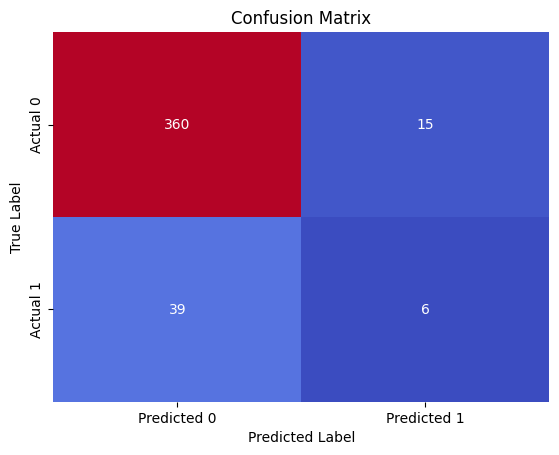

In [65]:
import seaborn as sns

# Assuming X_test and y_test are your test data
y_pred = clf1.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap with 'coolwarm' colormap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


                     Feature  Importance
22          StockOptionLevel    0.299128
15             MonthlyIncome    0.255817
10            JobInvolvement    0.093245
18                  OverTime    0.074304
0                        Age    0.059160
9                 HourlyRate    0.055706
17        NumCompaniesWorked    0.055611
27        YearsInCurrentRole    0.048241
16               MonthlyRate    0.029452
12                   JobRole    0.029337
19         PercentSalaryHike    0.000000
28   YearsSinceLastPromotion    0.000000
26            YearsAtCompany    0.000000
25           WorkLifeBalance    0.000000
24     TrainingTimesLastYear    0.000000
23         TotalWorkingYears    0.000000
2                  DailyRate    0.000000
21  RelationshipSatisfaction    0.000000
20         PerformanceRating    0.000000
5                  Education    0.000000
3                 Department    0.000000
6             EducationField    0.000000
1             BusinessTravel    0.000000
14             M

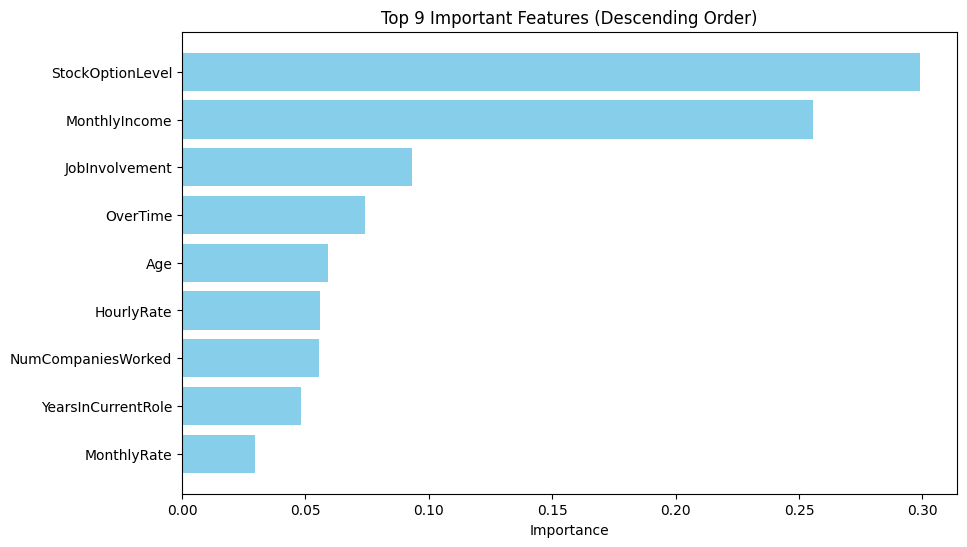

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming clf1 is your trained decision tree classifier
feature_importances = clf1.feature_importances_
features = X.columns  # Assuming X is your feature matrix, adjust accordingly

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print(feature_importance_df)

# Plot the top 9 important features in descending order
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(9)[::-1], feature_importance_df['Importance'].head(9)[::-1], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 9 Important Features (Descending Order)')
plt.show()


In [67]:
from sklearn import metrics  # Import the metrics module from scikit-learn

# Assuming y_pred is your predicted labels
print(classification_report(y_test, y_pred, labels=[0, 1]))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       375
           1       0.29      0.13      0.18        45

    accuracy                           0.87       420
   macro avg       0.59      0.55      0.56       420
weighted avg       0.84      0.87      0.85       420

[[360  15]
 [ 39   6]]


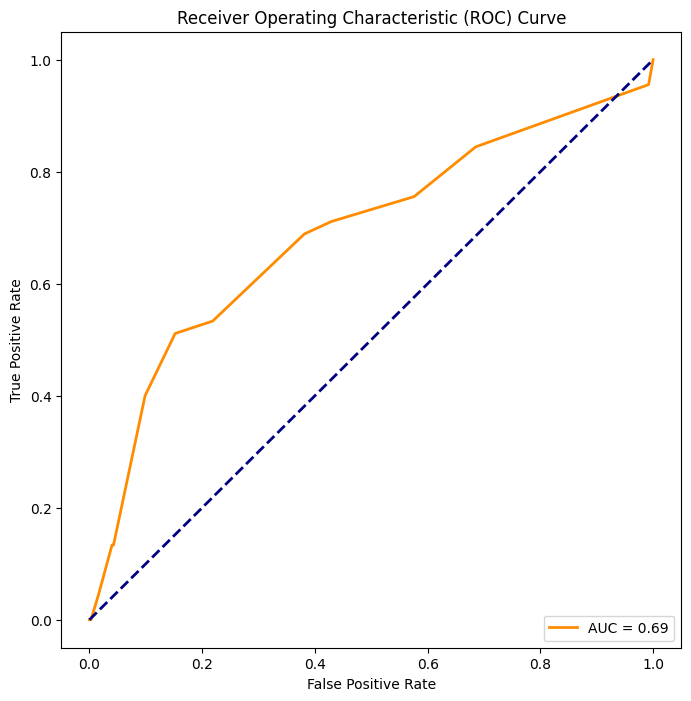

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_pred_prob is the predicted probabilities for the positive class
y_pred_prob = clf1.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Random Forest Classifier

In [69]:
# Using RandomForestClassifier for Classification

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Build RandomForestClassifier object with specific settings
model_rf = RandomForestClassifier(n_estimators=3, random_state=42, max_depth=2)

In [71]:
# Fit the RandomForestClassifier model on the training data
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [72]:
# Use the trained RandomForestClassifier to predict on the test data
y_pred=model_rf.predict(X_test)
y_pred #predit classes of test data set
# Display the first 10 values from y_pred
print(y_pred[:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [73]:
# true target variable for the test data
y_test
print(y_test[:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [74]:
import pandas as pd
# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame({'True Classes': y_test, 'Predicted Classes': y_pred})


# Display the first 10 rows of the DataFrame
print(comparison_df.head(10))


   True Classes  Predicted Classes
0             0                  0
1             0                  0
2             0                  0
3             0                  0
4             0                  0
5             0                  0
6             0                  0
7             0                  0
8             0                  0
9             0                  0


In [75]:
# Calculate the accuracy score of the RandomForestClassifier on the test data
model_rf.score(X_test,y_test)

0.8952380952380953

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       375
           1       0.67      0.04      0.08        45

    accuracy                           0.90       420
   macro avg       0.78      0.52      0.51       420
weighted avg       0.87      0.90      0.85       420



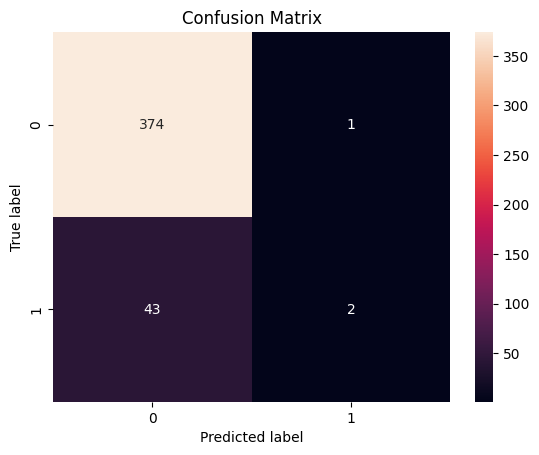

In [76]:
# Create confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")
print(classification_report(y_test, y_pred))
xticklabels=["Predicted 0", "Predicted 1"]
yticklabels=["Actual 0", "Actual 1"]
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [77]:
# Create a DataFrame to store feature importances
feature_df = pd.DataFrame({'features': model_rf.feature_names_in_, 'importances': model_rf.feature_importances_})

# Sort the DataFrame by importances in descending order
feature_df = feature_df.sort_values(by="importances", ascending=False)

# Display the sorted feature importances DataFrame
print(feature_df)


                    features  importances
27        YearsInCurrentRole     0.456347
15             MonthlyIncome     0.173351
18                  OverTime     0.162874
23         TotalWorkingYears     0.103467
19         PercentSalaryHike     0.067708
26            YearsAtCompany     0.036254
1             BusinessTravel     0.000000
28   YearsSinceLastPromotion     0.000000
25           WorkLifeBalance     0.000000
24     TrainingTimesLastYear     0.000000
22          StockOptionLevel     0.000000
21  RelationshipSatisfaction     0.000000
20         PerformanceRating     0.000000
17        NumCompaniesWorked     0.000000
16               MonthlyRate     0.000000
0                        Age     0.000000
14             MaritalStatus     0.000000
13           JobSatisfaction     0.000000
12                   JobRole     0.000000
11                  JobLevel     0.000000
10            JobInvolvement     0.000000
9                 HourlyRate     0.000000
8                     Gender     0

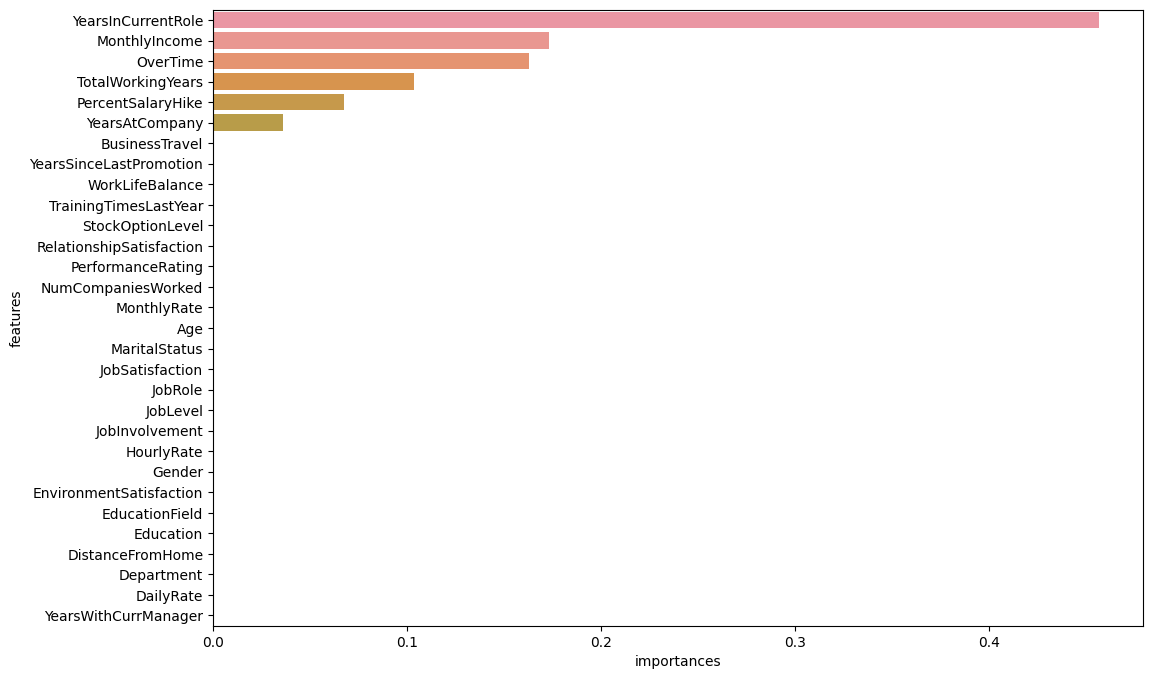

In [78]:
# Visualize Feature Importances in RandomForestClassifier
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
sns.barplot(data=feature_df, x="importances", y="features")
plt.show()

## How to find out correct set of hyperparameters in Random Forest classifier

In [79]:
# Randomized Search for Hyperparameter Tuning in RandomForestClassifier
# n_estimators 
# max_depth 
# criertion 
# max_features 

# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter search space
param = { 'n_estimators': randint(50, 500),
          'max_depth' : randint(1, 50), 
          'criterion': ['gini', 'entropy'],
          'max_features': ['auto', 'sqrt', 'log2', None]}

# create a random forest classifier 
rf = RandomForestClassifier()

# Try all possible combinations from the param set 
rand_search = RandomizedSearchCV(rf, param_distributions=param, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7daf61791840>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7daf6bdb61d0>})

In [80]:
# display the the best model 
best_rf = rand_search.best_estimator_ 

print( " Best Hyperparameters", rand_search.best_params_ )

 Best Hyperparameters {'criterion': 'entropy', 'max_depth': 21, 'max_features': None, 'n_estimators': 234}


In [81]:
# generate prediction with this best model 
y_pred = best_rf.predict(X_test)

In [82]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
# Calculate the accuracy score of the RandomForestClassifier on the test data
accuracy_rf = best_rf.score(X_test, y_test)
# Print the accuracy score
print(accuracy_rf)

0.8928571428571429


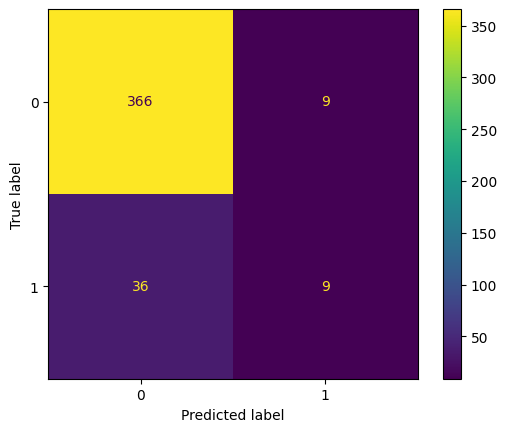

In [84]:
# Create confusion matrix from the best model 
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [85]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       375
           1       0.50      0.20      0.29        45

    accuracy                           0.89       420
   macro avg       0.71      0.59      0.61       420
weighted avg       0.87      0.89      0.87       420



## Random Forest Classifier with SMOTEENN

In [86]:
#Create an instance of SMOTEENN for oversampling and cleaning
from imblearn.combine import SMOTEENN
!pip install imbalanced-learn

sm = SMOTEENN()

In [87]:
# Apply SMOTEENN for oversampling and cleaning
X_resampled1, y_resampled1 = sm.fit_resample(X, y)

In [88]:
# Split the resampled data into training and testing sets
Xr_train1,Xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [89]:
# Instantiate RandomForestClassifier object with specific settings for SMOTEENN resampled data
model_rf_smote=RandomForestClassifier(n_estimators=341, criterion='gini', random_state = 100,max_depth=11 )

In [90]:
# Fit (train) the RandomForestClassifier on the SMOTEENN resampled training data
model_rf_smote.fit(Xr_train1,yr_train1)

RandomForestClassifier(max_depth=11, n_estimators=341, random_state=100)

In [91]:
# Use the trained RandomForestClassifier to predict on the SMOTEENN resampled test data
yr_predict1 = model_rf_smote.predict(Xr_test1)

In [92]:
# Calculate the accuracy score of the RandomForestClassifier on the SMOTEENN resampled test data
model_score_r1 = model_rf_smote.score(Xr_test1, yr_test1)

In [93]:
# Print Accuracy Score for RandomForestClassifier on SMOTEENN Resampled Test Data
accuracy_rf_smote = model_score_r1
print(accuracy_rf_smote)

0.9536231884057971


In [94]:
# Print Classification Report for RandomForestClassifier on SMOTEENN Resampled Test Data
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       135
           1       0.96      0.97      0.96       210

    accuracy                           0.95       345
   macro avg       0.95      0.95      0.95       345
weighted avg       0.95      0.95      0.95       345



In [95]:
# Print Confusion Matrix for RandomForestClassifier on SMOTEENN Resampled Test Data
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[126   9]
 [  7 203]]


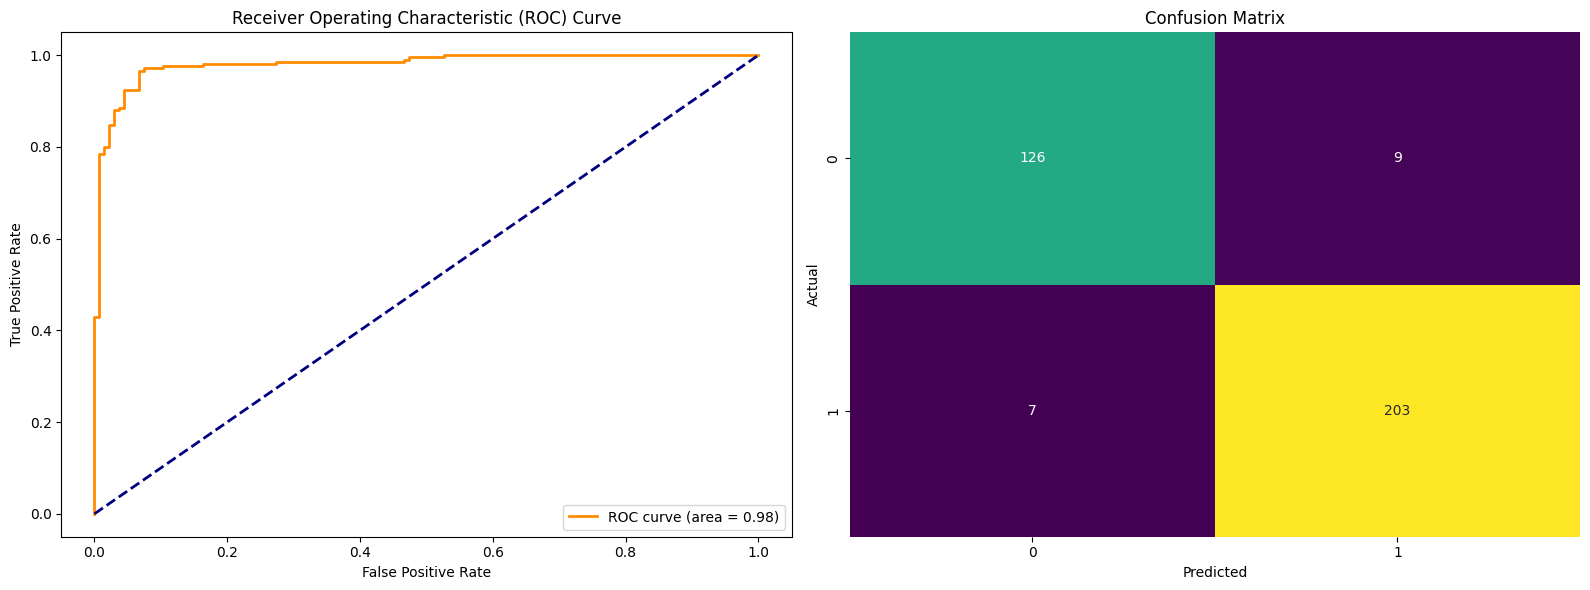

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Calculate predicted probabilities
yr_pred_prob1 = model_rf_smote.predict_proba(Xr_test1)[:, 1]

# Calculate ROC curve
fpr1, tpr1, thresholds1 = roc_curve(yr_test1, yr_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

# Set the "viridis" color map for the confusion matrix
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Plot ROC Curve and Confusion Matrix
plt.figure(figsize=(16, 6))

# Plotting ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Confusion Matrix
plt.subplot(1, 2, 2)
cm1 = confusion_matrix(yr_test1, yr_predict1)
sns.heatmap(cm1, annot=True, fmt='d', cmap=custom_palette, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


so best mode is we are selecting Random Forest Classifier with SMOTEENN . we are getting 91% accuracy onthe train data set

In [97]:
models = pd.DataFrame({
    'Model': ['Logistics Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Random Forest Classifier with Smotenn'],
    'Accuracy': [accuracy_lg, accuracy_dec, accuracy_rf, accuracy_rf_smote]
})

models.sort_values(by='Accuracy', ascending=True)

# Display the DataFrame
print(models)


                                   Model  Accuracy
0                   Logistics Regression  0.871429
1               Decision Tree Classifier  0.871429
2               Random Forest Classifier  0.892857
3  Random Forest Classifier with Smotenn  0.953623


In [98]:
models = pd.DataFrame({
    'Model': ['Logistics Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Random Forest Classifier with Smotenn'],
    'Accuracy': [accuracy_lg, accuracy_dec, accuracy_rf, accuracy_rf_smote]
})

# Sort the DataFrame by 'Accuracy' in descending order
models_sorted = models.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
print(models_sorted)

# Display the top score
top_score = models_sorted.iloc[0]['Accuracy']
print(f"Top Accuracy Score: {top_score}")


                                   Model  Accuracy
3  Random Forest Classifier with Smotenn  0.953623
2               Random Forest Classifier  0.892857
0                   Logistics Regression  0.871429
1               Decision Tree Classifier  0.871429
Top Accuracy Score: 0.9536231884057971


In [99]:
# pip install pandas matplotlib tabulate

                                   Model  Accuracy
3  Random Forest Classifier with Smotenn      0.91
1               Decision Tree Classifier      0.90
2               Random Forest Classifier      0.88
0                   Logistics Regression      0.85
Top Accuracy Score: 0.91


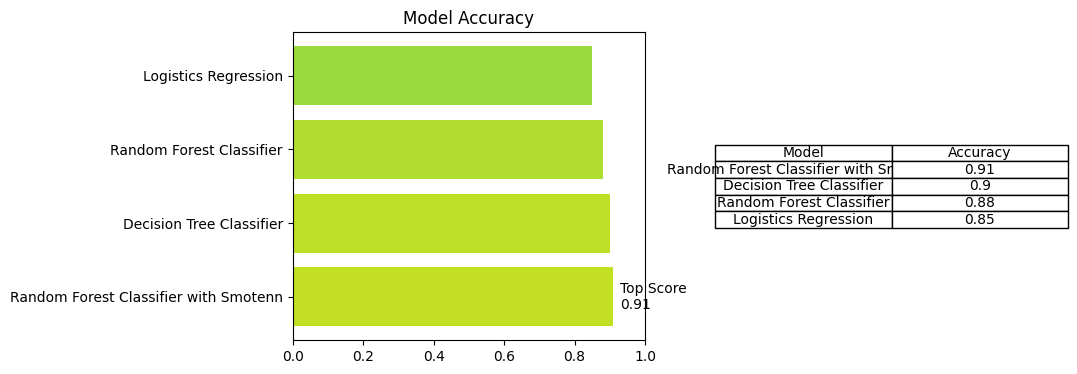

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample accuracy scores
accuracy_lg = 0.85
accuracy_dec = 0.90
accuracy_rf = 0.88
accuracy_rf_smote = 0.91

# Create a DataFrame with model names and accuracy scores
models = pd.DataFrame({
    'Model': ['Logistics Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Random Forest Classifier with Smotenn'],
    'Accuracy': [accuracy_lg, accuracy_dec, accuracy_rf, accuracy_rf_smote]
})

# Sort the DataFrame by 'Accuracy' in descending order
models_sorted = models.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
print(models_sorted)

# Display the top score
top_score = models_sorted.iloc[0]['Accuracy']
print(f"Top Accuracy Score: {top_score}")

# Set the size for both plot and table
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # You can adjust the figsize as needed

# Plot the horizontal bar chart
colors = plt.cm.viridis(models_sorted['Accuracy'])
ax1.barh(models_sorted['Model'], models_sorted['Accuracy'], color=colors)
ax1.set_xlim(0, 1)  # Set x-axis limit to match the range of accuracy scores
ax1.set_title('Model Accuracy')

# Display the top score on the plot
ax1.text(top_score + 0.02, 0, f'Top Score\n{top_score:.2f}', verticalalignment='center', fontsize=10)

# Display the table
ax2.axis('off')  # Turn off the axis for the table
table_data = models_sorted[['Model', 'Accuracy']].values
table = ax2.table(cellText=table_data, colLabels=models_sorted.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()


## Prediction

In [101]:
# Prediction attrition for test Data set
df_2 = pd.read_csv('/kaggle/input/ipba17-grade-ml-case-study-classification-code/test.csv')  # Test

In [102]:
features_train = X.columns

In [103]:
import pandas as pd

# Assuming df_2 is your testing dataset
# Drop columns that are not needed for prediction
drop_cols = ['id', 'EmployeeCount', 'Over18', 'StandardHours']
X_test = df_2.drop(drop_cols, axis=1, errors='ignore')

# List of categorical columns to one-hot encode
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Filter categorical columns present in the testing dataset
categorical_columns = [col for col in categorical_columns if col in X_test.columns]

# Convert categorical variables into dummy/indicator variables with consistent encoding
X_test = pd.get_dummies(X_test, columns=categorical_columns)

# Assuming you have a training dataset X_train, and features_train is defined based on X_train
# Ensure that the features in X_test are in the same order as in the training data
X_test = X_test.reindex(columns=features_train, fill_value=0)


In [104]:
# Make predictions on the testing dataset
test_predictions = model_rf_smote.predict(X_test)

# If you want the probability scores for each class (in case of a binary classification problem)
test_probabilities = model_rf_smote.predict_proba(X_test)[:, 1]

# Now we can use 'test_predictions' or 'test_probabilities' as per your requirement
# 'test_predictions' contains the predicted class labels (0 or 1)
# 'test_probabilities' contains the probability scores for class 1


In [105]:
print(test_predictions)
print(test_probabilities)

[1 0 0 ... 0 0 0]
[0.64168967 0.11893849 0.31796625 ... 0.15682599 0.0933942  0.14194071]


# ****Pulling final submission file

In [106]:
sample_submission = pd.read_csv('/kaggle/input/ipba17-grade-ml-case-study-classification-code/sample_submission.csv')# Submission file

In [107]:
sample_submission.head()

,id,Attrition
0,1677,0.119261
1,1678,0.119261
2,1679,0.119261
3,1680,0.119261
4,1681,0.119261


In [108]:
# Assuming  loaded and preprocessed  test data (X_test) similarly to the training data

# Make predictions on the test data
test_predictions = model_rf_smote.predict(X_test)

# Replace 'Attrition' column in sample_submission with predicted values
sample_submission['Attrition'] = test_predictions

# Save the modified DataFrame to a new CSV file
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)
